# Before you start :
   - These exercises are related to the Subsetting and Descriptive Stats lessons.
   - Keep in mind that you need to use some of the functions you learned in the previous lessons.
   - All datasets are provided in the `your-code` folder of this lab.
   - Elaborate your codes and outputs as much as you can.
   - Try your best to answer the questions and complete the tasks and most importantly enjoy the process!!!

#### Import all the libraries that are necessary

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

# Challenge 1

#### In this challenge we will use the `Temp_States.csv` file. 

#### First import it into a data frame called `temp`.

In [2]:
temp = pd.read_csv('/home/julian/Cursos/Ironhack/Labs/lab-descriptive-stats/your-code/Temp_States.csv')

#### Print `temp`

In [3]:
temp.head()

,City,State,Temperature
0,NYC,New York,19.444444
1,Albany,New York,9.444444
2,Buffalo,New York,3.333333
3,Hartford,Connecticut,17.222222
4,Bridgeport,Connecticut,14.444444


#### Explore the data types of the Temp dataframe. What type of data do we have? Comment your result.

In [4]:
temp.dtypes

City            object
State           object
Temperature    float64
dtype: object

#### Select the rows where state is New York

In [5]:
temp.State

0       New York
1       New York
2       New York
3    Connecticut
4    Connecticut
5     New Jersey
6     New Jersey
Name: State, dtype: object

In [6]:
ny = temp[temp.State == 'New York']

In [7]:
ny

,City,State,Temperature
0,NYC,New York,19.444444
1,Albany,New York,9.444444
2,Buffalo,New York,3.333333


#### What is the average of the temperature of cities in New York?

In [8]:
ny.Temperature.mean() 

10.74074074074074

#### We want to know cities and states with Temperature above 15 degress Celcius

In [9]:
temp[temp.Temperature > 15]

,City,State,Temperature
0,NYC,New York,19.444444
3,Hartford,Connecticut,17.222222
5,Treton,New Jersey,22.222222
6,Newark,New Jersey,20.000000


#### Now, return only the cities that have a temperature above 15 degress Celcius

In [10]:
temp.City.loc[temp.Temperature > 15]

0         NYC
3    Hartford
5      Treton
6      Newark
Name: City, dtype: object

#### We want to know which cities have a temperature above 15 degrees Celcius and below 20 degrees Celcius

*Hint: First write the condition then select the rows.*

In [11]:
temp.City.loc[(temp.Temperature > 15) & (temp.Temperature < 20)]

0         NYC
3    Hartford
Name: City, dtype: object

#### Find the mean and the standard deviation of the temperature of each state.

*Hint: Use functions from Data Manipulation lesson*

In [12]:
temp.groupby('State').mean()

,Temperature
State,
Connecticut,15.833333
New Jersey,21.111111
New York,10.740741


In [13]:
temp.groupby('State').std()

,Temperature
State,
Connecticut,1.964186
New Jersey,1.571348
New York,8.133404


In [14]:
temp_descr = temp.groupby('State').agg({'Temperature': [np.mean, np.std]})

In [15]:
temp_descr

Temperature          
                   mean       std
State                            
Connecticut   15.833333  1.964186
New Jersey    21.111111  1.571348
New York      10.740741  8.133404

# Challenge 2

#### Load the `employee.csv` file into a DataFrame. Call the dataframe `employee`

In [16]:
employee = pd.read_csv('/home/julian/Cursos/Ironhack/Labs/lab-descriptive-stats/your-code/Employee.csv')

In [17]:
employee.head()

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30
3,Sonia,HR,Bachelor,F,analyst,4,35
4,Samuel,Sales,Master,M,associate,3,55


#### Explore the data types of the Temp dataframe. Comment your results

In [18]:
employee.dtypes

Name          object
Department    object
Education     object
Gender        object
Title         object
Years          int64
Salary         int64
dtype: object

In [19]:
employee.shape

(9, 7)

#### Show visually the frequency distribution (histogram) of the employee dataset. In few words describe these histograms?

In [20]:
#sns.histplot(x=employee.Years)

#### What's the average salary in this company?

In [21]:
avg_salary = employee.Salary.mean()
avg_salary

48.888888888888886

#### What's the highest salary?

In [22]:
max_salary = employee.Salary.max()
max_salary

70

#### What's the lowest salary?

In [23]:
min_salary = employee.Salary.min()
min_salary

30

#### Who are the employees with the lowest salary?

In [24]:
employee.Name[employee.Salary == 30]

1    Maria
2    David
Name: Name, dtype: object

#### Could you give all the information about an employee called David?

In [25]:
employee.loc[employee.Name == 'David']

,Name,Department,Education,Gender,Title,Years,Salary
2,David,HR,Master,M,analyst,2,30


#### Could you give only David's salary?

In [26]:
employee.loc[employee.Name == 'David'].Salary

2    30
Name: Salary, dtype: int64

#### Print all the rows where job title is associate

In [27]:
employee[employee.Title == 'associate']

,Name,Department,Education,Gender,Title,Years,Salary
4,Samuel,Sales,Master,M,associate,3,55
5,Eva,Sales,Bachelor,F,associate,2,55
7,Pedro,IT,Phd,M,associate,7,60


#### Print the first 3 rows of your dataframe

##### Tip : There are 2 ways to do it. Do it both ways

In [28]:
employee.head(3)

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30


In [29]:
employee.iloc[0:3]

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30


#### Find the employees who's title is associate and the salary above 55?

In [30]:
employee.loc[(employee.Title == 'associate') & (employee.Salary > 55)]

,Name,Department,Education,Gender,Title,Years,Salary
7,Pedro,IT,Phd,M,associate,7,60


#### Group the employees based on their number of years of employment. What are the average salaries in each group?

In [31]:
employee.groupby('Years').agg({'Salary': [np.average]})

,Salary
,average
Years,
1,35.000000
2,38.333333
3,55.000000
4,35.000000
7,60.000000
8,70.000000


####  What is the average Salary per title?

In [32]:
employee.groupby('Title').agg({'Salary': [np.average]})

,Salary
,average
Title,
VP,70.000000
analyst,32.500000
associate,56.666667


#### Show a visual summary of the data using boxplot. What Are the First and Third Quartiles? Comment your results.
##### * Hint : Quantiles vs Quartiles*
##### - `In Probability and Statistics, quantiles are cut points dividing the range of a probability distribution into continuous intervals with equal probabilities. When division is into four parts the values of the variate corresponding to 25%, 50% and 75% of the total distribution are called quartiles.`

In [33]:
#sns.boxplot(x='Years', data=employee)

In [34]:
#sns.boxplot(x='Salary', data=employee)

#### Is the mean salary per gender different?

In [35]:
employee.groupby('Gender').agg({'Salary': [np.average]})

,Salary
,average
Gender,
F,47.5
M,50.0


#### Find the minimum, mean and the maximum of all numeric columns for each Department.

##### Hint: Use functions from Data Manipulation lesson

In [36]:
employee.groupby('Department').agg({'Years':[np.average, np.min, np.max], 'Salary': [np.average, np.min, np.max]})

Years            Salary          
             average amin amax average amin amax
Department                                      
HR          4.666667    2    8   45.00   30   70
IT          4.500000    1    8   48.75   30   70
Sales       2.500000    2    3   55.00   55   55

### Bonus Question

#### For each department, compute the difference between the maximal salary and the minimal salary.

##### * Hint: try using `agg` or `apply` and `lambda`*

In [37]:
employee.groupby('Department', as_index=False).agg({'Salary': lambda x: max(x) - min(x)})

,Department,Salary
0,HR,40
1,IT,40
2,Sales,0


# Challenge 3

#### Open the Orders.csv dataset. Name your dataset orders

In [38]:
orders = pd.read_csv('/home/julian/Cursos/Ironhack/Labs/lab-descriptive-stats/your-code/Orders.csv')

#### Explore your dataset by looking at the data types and the summary statistics. Comment your results

In [39]:
orders.shape

(397924, 14)

In [40]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397924 entries, 0 to 397923
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    397924 non-null  int64  
 1   InvoiceNo     397924 non-null  int64  
 2   StockCode     397924 non-null  object 
 3   year          397924 non-null  int64  
 4   month         397924 non-null  int64  
 5   day           397924 non-null  int64  
 6   hour          397924 non-null  int64  
 7   Description   397924 non-null  object 
 8   Quantity      397924 non-null  int64  
 9   InvoiceDate   397924 non-null  object 
 10  UnitPrice     397924 non-null  float64
 11  CustomerID    397924 non-null  int64  
 12  Country       397924 non-null  object 
 13  amount_spent  397924 non-null  float64
dtypes: float64(2), int64(8), object(4)
memory usage: 42.5+ MB


In [41]:
orders.describe()

,Unnamed: 0,InvoiceNo,year,month,day,hour,Quantity,UnitPrice,CustomerID,amount_spent
count,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000
mean,278465.221859,560617.126645,2010.934259,7.612537,3.614555,12.728247,13.021823,3.116174,15294.315171,22.394749
std,152771.368303,13106.167695,0.247829,3.416527,1.928274,2.273535,180.420210,22.096788,1713.169877,309.055588
min,0.000000,536365.000000,2010.000000,1.000000,1.000000,6.000000,1.000000,0.000000,12346.000000,0.000000
25%,148333.750000,549234.000000,2011.000000,5.000000,2.000000,11.000000,2.000000,1.250000,13969.000000,4.680000
50%,284907.500000,561893.000000,2011.000000,8.000000,3.000000,13.000000,6.000000,1.950000,15159.000000,11.800000
75%,410079.250000,572090.000000,2011.000000,11.000000,5.000000,14.000000,12.000000,3.750000,16795.000000,19.800000
max,541908.000000,581587.000000,2011.000000,12.000000,7.000000,20.000000,80995.000000,8142.750000,18287.000000,168469.600000


####  What is the average Purchase Price?

In [42]:
orders.UnitPrice.mean()

3.1161744805540756

#### What were the highest and lowest purchase prices? 

In [45]:
orders.head(2)

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
0,0,536365,85123A,2010,12,3,8,white hanging heart t-light holder,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,1,536365,71053,2010,12,3,8,white metal lantern,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34


#### Select all the customers we have in Spain

In [51]:
orders.CustomerID[orders.Country == 'Spain']

4250      12557
4251      12557
4252      12557
4253      12557
4254      12557
          ...  
394733    17097
394734    17097
394735    17097
394736    17097
394737    17097
Name: CustomerID, Length: 2485, dtype: int64

#### How many customers do we have in Spain?
##### Hint : Use value_counts()

In [59]:
len(orders.CustomerID[orders.Country == 'Spain'].unique())

30

#### Select all the customers who have bought more than 50 items ?

In [69]:
orders.loc[orders.Quantity > 50].CustomerID.unique()

array([13748, 15291, 14688, ..., 15877, 13298, 16446])

#### Select orders from Spain that are above 50 items

In [73]:
orders[(orders.Country == 'Spain') & (orders.Quantity > 50)].head(2)

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
4250,6421,536944,22383,2010,12,5,12,lunch bag suki design,70,2010-12-03 12:20:00,1.65,12557,Spain,115.5
4251,6422,536944,22384,2010,12,5,12,lunch bag pink polkadot,100,2010-12-03 12:20:00,1.45,12557,Spain,145.0


#### Select all free orders

In [75]:
orders[orders.UnitPrice == 0].head(2)

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
6914,9302,537197,22841,2010,12,7,14,round cake tin vintage green,1,2010-12-05 14:02:00,0.0,12647,Germany,0.0
22539,33576,539263,22580,2010,12,4,14,advent calendar gingham sack,4,2010-12-16 14:36:00,0.0,16560,United Kingdom,0.0


#### Select all orders that are 'lunch bag'
#### Hint: Use string functions

In [90]:
orders[orders.Description.str.contains("lunch box")].head()

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
35,35,536370,22629,2010,12,3,8,spaceboy lunch box,24,2010-12-01 08:45:00,1.95,12583,France,46.8
36,36,536370,22659,2010,12,3,8,lunch box i love london,24,2010-12-01 08:45:00,1.95,12583,France,46.8
37,37,536370,22631,2010,12,3,8,circus parade lunch box,24,2010-12-01 08:45:00,1.95,12583,France,46.8
94,94,536378,21559,2010,12,3,9,strawberry lunch box with cutlery,6,2010-12-01 09:37:00,2.55,14688,United Kingdom,15.3
95,95,536378,22352,2010,12,3,9,lunch box with cutlery retrospot,6,2010-12-01 09:37:00,2.55,14688,United Kingdom,15.3


#### Select all orders that are made in 2011 and are 'lunch bag'  

In [91]:
orders[(orders.Description.str.contains("lunch box")) & (orders.year == 2011)].head()

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
26440,42779,540021,22630,2011,1,2,12,dolly girl lunch box,1,2011-01-04 12:51:00,1.95,17841,United Kingdom,1.95
27110,44171,540157,21559,2011,1,3,11,strawberry lunch box with cutlery,6,2011-01-05 11:41:00,2.55,15311,United Kingdom,15.30
27111,44172,540157,21561,2011,1,3,11,dinosaur lunch box with cutlery,3,2011-01-05 11:41:00,2.55,15311,United Kingdom,7.65
27112,44173,540157,21558,2011,1,3,11,skull lunch box with cutlery,1,2011-01-05 11:41:00,2.55,15311,United Kingdom,2.55
27113,44174,540157,22352,2011,1,3,11,lunch box with cutlery retrospot,1,2011-01-05 11:41:00,2.55,15311,United Kingdom,2.55


#### Show the frequency distribution of the amount spent in Spain.

(0.0, 100.0)

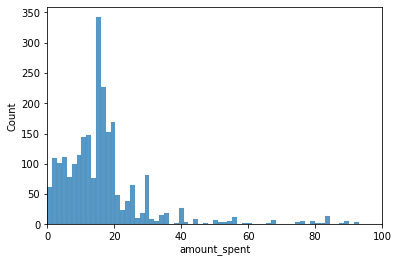

In [96]:
sns.histplot(x=orders[orders.Country == 'Spain'].amount_spent, data=orders)
plt.xlim([0, 100])

#### Select all orders made in the month of August

In [105]:
orders[orders.month == 8].head(3)

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
199475,285421,561904,22075,2011,8,1,8,6 ribbons elegant christmas,96,2011-08-01 08:30:00,1.45,17941,United Kingdom,139.20
199476,285422,561904,85049E,2011,8,1,8,scandinavian reds ribbons,156,2011-08-01 08:30:00,1.06,17941,United Kingdom,165.36
199477,285423,561905,21385,2011,8,1,9,ivory hanging decoration heart,24,2011-08-01 09:31:00,0.85,14947,United Kingdom,20.40


#### Select how many orders are made by countries in the month of August
##### Hint: Use value_counts()

In [121]:
orders[orders.month == 8].Country.value_counts()

United Kingdom     23105
Germany              795
EIRE                 593
France               569
Netherlands          280
Switzerland          267
Spain                252
Belgium              194
Israel               171
Channel Islands      140
Australia            107
Italy                 95
Austria               88
Norway                77
Finland               61
Malta                 55
Portugal              41
Sweden                40
Unspecified           23
Iceland               22
Poland                17
Denmark               16
Canada                 5
Name: Country, dtype: int64

#### What's the  average amount of money spent by country

In [123]:
orders.groupby('Country', as_index=False).agg({'amount_spent': [np.average]})

,Country,amount_spent
,,average
0,Australia,116.895620
1,Austria,25.624824
2,Bahrain,32.258824
3,Belgium,20.283772
4,Brazil,35.737500
5,Canada,24.280662
6,Channel Islands,27.340160
7,Cyprus,22.134169
8,Czech Republic,33.069600


#### What's the most expensive item?

In [134]:
orders.Description.loc[orders.UnitPrice == (orders.UnitPrice.max())]

118352    postage
Name: Description, dtype: object

#### What was the average amount spent per year ?

In [138]:
orders.groupby('year').agg({'amount_spent': [np.average]})

,amount_spent
,average
year,
2010,21.892733
2011,22.430074
